```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Area Plot (a)
B. Bar Chart (a)
C. Histogram (a)
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a)
G. Word Clouds
H. Folium Maps
I. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing if needed
- (a)or analysis :: Conclusion / Kesimpulan
```

---
# A. Area Plot

**Question**  // *Kumpulkan informasi menggunakan analisis kalian* 

## Question



Membandingkan pertumbuhan kasus kekerasan dengan kasus narkoba setiap tahunnya di Enfield

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

## 1. pre-processing if needed

In [1]:
import numpy as np
import pandas as pd

df_london_crime = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

In [2]:
df_london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df_london_crime['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [4]:
df_london_crime['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [5]:
df_london_crime['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [6]:
df_london_crime['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [7]:
df_london_crime['value'].unique()

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
         8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,
        21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,
        40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,
        51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55,
        81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,
       241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86,
        52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98,
        92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,
       131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,
       144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,
        85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,
       129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,
       244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 13

In [8]:
# Apakah ada data yang kosong?
df_london_crime.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
"""
Menfilter data dengan patokan
borough = Enfield
major category = Violence or Drugs
"""
df_violence_drugs_inenfield = df_london_crime[
    ((df_london_crime['major_category'] == 'Violence Against the Person') | 
    (df_london_crime['major_category'] == 'Drugs')) & 
    (df_london_crime['borough'] == 'Enfield')
]
df_violence_drugs_inenfield

,lsoa_code,borough,major_category,minor_category,value,year,month
23,E01001432,Enfield,Drugs,Possession Of Drugs,0,2011,5
197,E01001431,Enfield,Drugs,Drug Trafficking,0,2008,5
281,E01001499,Enfield,Violence Against the Person,Other violence,1,2014,9
363,E01001449,Enfield,Violence Against the Person,Common Assault,0,2008,7
473,E01001458,Enfield,Drugs,Other Drugs,0,2014,6
...,...,...,...,...,...,...,...
13490310,E01001531,Enfield,Violence Against the Person,Common Assault,0,2009,7
13490370,E01001550,Enfield,Violence Against the Person,Offensive Weapon,0,2009,7
13490512,E01001432,Enfield,Violence Against the Person,Wounding/GBH,0,2013,10
13490514,E01001442,Enfield,Violence Against the Person,Common Assault,1,2009,8


In [10]:
"""
Melakukan sum terhadap jumlah kasusnya
"""
df_vde = df_violence_drugs_inenfield.groupby(by=['major_category', 'year']).sum()
df_vde.drop(columns=['month'], inplace=True)
df_vde

value
major_category              year       
Drugs                       2008   2125
                            2009   1620
                            2010   1649
                            2011   1451
                            2012   1135
                            2013   1557
                            2014   1420
                            2015   1231
                            2016   1063
Violence Against the Person 2008   3767
                            2009   4172
                            2010   4185
                            2011   4074
                            2012   4231
                            2013   4516
                            2014   5965
                            2015   6717
                            2016   7409

In [11]:
"""
Membuat agar year menjadi index dan membuat kolom 
untuk value dari drugs dan value dari violance 
"""
df_vde2 = df_vde.reset_index()
df_vde2.drop(columns=['major_category'], inplace=True)
df_vde2['value2'] = 1000
df_vde2['value2'][0:9] = df_vde2['value'][9:]
df_vde2 = df_vde2.iloc[:9]
df_vde2.set_index(keys='year', inplace=True)
df_vde2.rename(columns={
    'value' : 'Drugs',
    'value2' : 'Violence Against the Person'
}, inplace=True)
df_vde2

,Drugs,Violence Against the Person
year,,
2008,2125,3767
2009,1620,4172
2010,1649,4185
2011,1451,4074
2012,1135,4231
2013,1557,4516
2014,1420,5965
2015,1231,6717
2016,1063,7409


In [12]:
df_vde2.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='year')

**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

## 2. create visualization

In [13]:

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

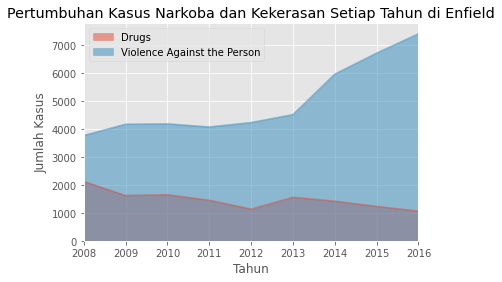

In [14]:
df_vde2.plot(kind='area', 
             stacked=False,
             alpha=0.5,
             xlim=(2008, 2016)
            )

plt.title('Pertumbuhan Kasus Narkoba dan Kekerasan Setiap Tahun di Enfield')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*



## 3. conclusion 



Peningkatan kekerasan terhadap seseorang di daerah Enfield 
hampir berbanding terbalik dengan jumlah pengguna narkoba di Enfield

---
# B. Bar Chart

## Question: 
Melihat grafik pertahun antara kasus kekerasan dengan kasus pencurian di enfield

## 1. pre-processing if needed

In [15]:
"""
Menfilter data dengan patokan
borough = Enfield
major category = Violence or Theft and Handling
"""
df_violence_drugs_inenfield = df_london_crime[
    ((df_london_crime['major_category'] == 'Violence Against the Person') | 
    (df_london_crime['major_category'] == 'Theft and Handling')) & 
    (df_london_crime['borough'] == 'Enfield')
]

"""
Melakukan sum terhadap jumlah kasusnya
"""
df_vde = df_violence_drugs_inenfield.groupby(by=['major_category', 'year']).sum()
df_vde.drop(columns=['month'], inplace=True)

"""
Membuat agar year menjadi index dan membuat kolom 
untuk value dari drugs dan value dari violance 
"""
df_vde2 = df_vde.reset_index()
df_vde2.drop(columns=['major_category'], inplace=True)
df_vde2['value2'] = 1000
df_vde2['value2'][0:9] = df_vde2['value'][9:]
df_vde2 = df_vde2.iloc[:9]
df_vde2.set_index(keys='year', inplace=True)
df_vde2.rename(columns={
    'value' : 'Theft and Handling',
    'value2' : 'Violence Against the Person'
}, inplace=True)
df_vde2

,Theft and Handling,Violence Against the Person
year,,
2008,7454,3767
2009,6807,4172
2010,7165,4185
2011,7847,4074
2012,8425,4231
2013,8814,4516
2014,7995,5965
2015,7827,6717
2016,8037,7409


## 2. create visualization

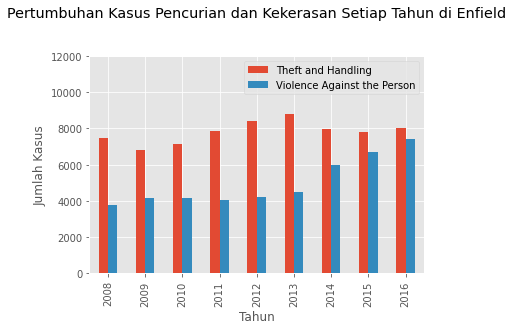

In [16]:

df_vde2.plot.bar()
plt.title('Pertumbuhan Kasus Pencurian dan Kekerasan Setiap Tahun di Enfield', y=1.15)
plt.ylim(top=12000)
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

## 3. conclusion

Kekerasan terhadap orang meningkat dari tahun 2013 hingga 2016, 
tetapi tingkat pencurian mengalami penurunan pada tahun 2013 - 2014
Selanjutnya, tingkat pencurian menjadi sedikit perubahan.


---
# C. Histogram


## Question: 


## 1. pre-processing if needed

In [17]:
df_enfield = df_london_crime[df_london_crime['borough'] == 'Enfield'].copy()
df_enfield = df_enfield.groupby(['major_category']).sum()
# df_enfield.drop(columns=['month', 'year', 'borough','lsoa_code','minor_category'], inplace=True)
df_enfield.drop(columns=['month', 'year'], inplace=True)
# df_enfield.reset_index(inplace = True)
# df_enfield.set_index('lsoa_code', inplace=True)
df_enfield

,value
major_category,
Burglary,30213
Criminal Damage,22487
Drugs,13251
Fraud or Forgery,132
Other Notifiable Offences,3293
Robbery,9059
Sexual Offences,38
Theft and Handling,70371
Violence Against the Person,45036


## 2. create visualization

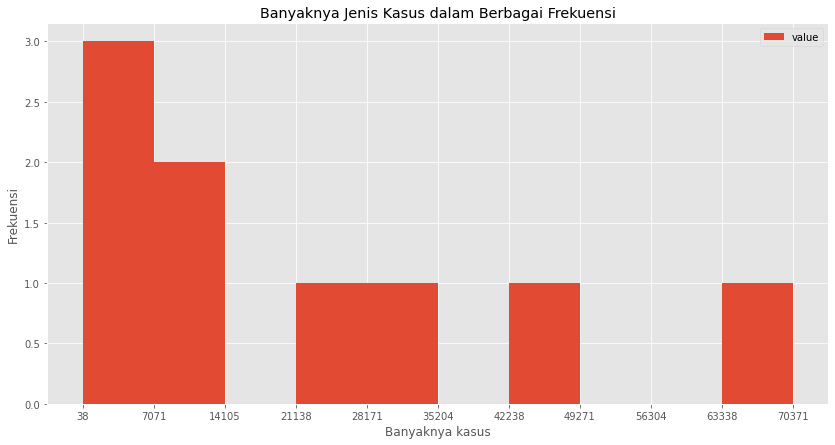

In [18]:
count, bin_edge = np.histogram(df_enfield)
df_enfield.plot(kind='hist', xticks=bin_edge, figsize=(14, 7))
plt.title('Banyaknya Jenis Kasus dalam Berbagai Frekuensi')
plt.ylabel('Frekuensi')
plt.xlabel('Banyaknya kasus')
plt.show()

## 3. conclusion

Hanya terdapat tiga jenis kasus yang berfrekuensi paling rendah dan satu jenis kasus yang berfrekuensi paling tinggi. 

---
# D. Pie Chart

## Question:
Membandingkan Katergori besar di Enfield

## 1. pre-processing if needed


In [19]:
"""
Melakukan pengelompokan berdasarkan major_category, lalu
buang kolom tahun sama bulan
"""

df_enfield_crime = df_london_crime[df_london_crime['borough'] == 'Enfield'].groupby(['major_category']).sum()
df_enfield_crime.drop(columns=['year', 'month'], inplace=True)
df_enfield_crime

,value
major_category,
Burglary,30213
Criminal Damage,22487
Drugs,13251
Fraud or Forgery,132
Other Notifiable Offences,3293
Robbery,9059
Sexual Offences,38
Theft and Handling,70371
Violence Against the Person,45036


In [20]:
"""
Menghapus data yang di bawah 1000 agar merapihkan pie chart
yang nantinya akan dibuat
"""

df_enfield_crime2 = df_enfield_crime[df_enfield_crime['value'] > 1000]
df_enfield_crime2

,value
major_category,
Burglary,30213
Criminal Damage,22487
Drugs,13251
Other Notifiable Offences,3293
Robbery,9059
Theft and Handling,70371
Violence Against the Person,45036


## 2. create visualization

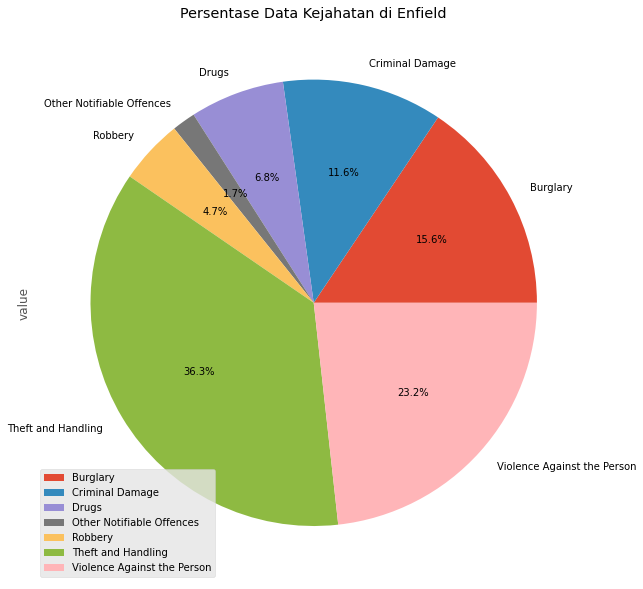

In [21]:
"""
Membuat piechart beserta persentasenya
"""

df_enfield_crime2.plot.pie(y='value', figsize=(10, 30), autopct='%1.1f%%')
plt.title('Persentase Data Kejahatan di Enfield')
plt.show()

## 3. conclusion
Berdasarkan data tersebut, kita mengetahui bahwa
Theft and Handling berada di urutan pertama, Violence kedua, Burglary ketiga, dst.

---
# E. Box Plot

## Question:
Membandingkan kasus kekerasan dengan kasus narkoba di Enfield


## 1. pre-processing if needed

In [22]:
"""
Menfilter data dengan patokan
borough = Enfield
major category = Violence or Drugs
"""

df_violence_drugs_inenfield = df_london_crime[
    ((df_london_crime['major_category'] == 'Violence Against the Person') | 
    (df_london_crime['major_category'] == 'Drugs')) & 
    (df_london_crime['borough'] == 'Enfield')
]
df_violence_drugs_inenfield

,lsoa_code,borough,major_category,minor_category,value,year,month
23,E01001432,Enfield,Drugs,Possession Of Drugs,0,2011,5
197,E01001431,Enfield,Drugs,Drug Trafficking,0,2008,5
281,E01001499,Enfield,Violence Against the Person,Other violence,1,2014,9
363,E01001449,Enfield,Violence Against the Person,Common Assault,0,2008,7
473,E01001458,Enfield,Drugs,Other Drugs,0,2014,6
...,...,...,...,...,...,...,...
13490310,E01001531,Enfield,Violence Against the Person,Common Assault,0,2009,7
13490370,E01001550,Enfield,Violence Against the Person,Offensive Weapon,0,2009,7
13490512,E01001432,Enfield,Violence Against the Person,Wounding/GBH,0,2013,10
13490514,E01001442,Enfield,Violence Against the Person,Common Assault,1,2009,8


In [23]:
"""
Melakukan sum terhadap jumlah kasusnya
"""
df_vde = df_violence_drugs_inenfield.groupby(by=['major_category', 'year']).sum()
df_vde.drop(columns=['month'], inplace=True)
df_vde

value
major_category              year       
Drugs                       2008   2125
                            2009   1620
                            2010   1649
                            2011   1451
                            2012   1135
                            2013   1557
                            2014   1420
                            2015   1231
                            2016   1063
Violence Against the Person 2008   3767
                            2009   4172
                            2010   4185
                            2011   4074
                            2012   4231
                            2013   4516
                            2014   5965
                            2015   6717
                            2016   7409

In [24]:
"""
Membuat agar year menjadi index dan membuat kolom 
untuk value dari drugs dan value dari violance 
"""
df_vde2 = df_vde.reset_index()
df_vde2.drop(columns=['major_category'], inplace=True)
df_vde2['value2'] = 1000
df_vde2['value2'][0:9] = df_vde2['value'][9:]
df_vde2 = df_vde2.iloc[:9]
df_vde2.set_index(keys='year', inplace=True)
df_vde2.rename(columns={
    'value' : 'Drugs',
    'value2' : 'Violence Against the Person'
}, inplace=True)
df_vde2

,Drugs,Violence Against the Person
year,,
2008,2125,3767
2009,1620,4172
2010,1649,4185
2011,1451,4074
2012,1135,4231
2013,1557,4516
2014,1420,5965
2015,1231,6717
2016,1063,7409


## 2. create visualization

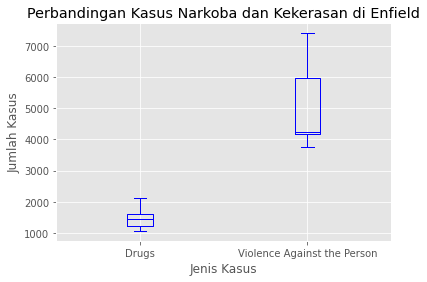

In [25]:

df_vde2.plot(kind='box', 
             color='blue',
            )

plt.title('Perbandingan Kasus Narkoba dan Kekerasan di Enfield')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Jenis Kasus')
plt.show()

## 3. conclusion 
Perbedaan jumlah antara kasus Narkoba dengan kasus kekerasan sangatlah jauh. 
Bahkan, jumlah kasus per tahun minimal dari kekerasan masih jauh di atas maksimal dari kasus narkoba 

---
# F. Scatter Plot

## Question: ......

Pertumbuhan kejahatan di Enfield periode 2008 - 2016

## 1. pre-processing if needed

In [26]:
df_enfield = df_london_crime[df_london_crime['borough'] == 'Enfield']
df_enfield = df_enfield.groupby(['year']).sum()
df_enfield.drop(columns=['month'], inplace=True)
df_enfield.reset_index(inplace=True)
df_enfield

,year,value
0,2008,21980
1,2009,21147
2,2010,20808
3,2011,21041
4,2012,21069
5,2013,21574
6,2014,21700
7,2015,22076
8,2016,22485


## 2. create visualization

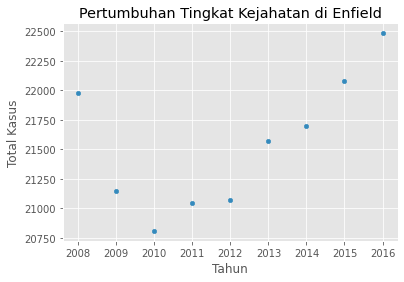

In [27]:
df_enfield.plot.scatter(x='year', y='value')
plt.title('Pertumbuhan Tingkat Kejahatan di Enfield')
plt.ylabel('Total Kasus')
plt.xlabel('Tahun')
plt.show()

## 3. conclusion

Tingkat Kejahatan minimal di tahun 2010 dan maksimal di tahun 2016. Dari tahun 2010 - 2016 
mengalami pertumbuhan.


---
# F. Word Cloud

## Question
Kejahatan di Enfield dalam bentuk WordCloud

## 1.pre-processing if needed

In [28]:
from wordcloud import WordCloud

df_enfield = df_london_crime[df_london_crime['borough'] == 'Enfield']
df_enfield_major = df_enfield.groupby(['major_category']).sum()
df_enfield_major.drop(columns=['year', 'month'], inplace=True)
df_enfield_major

,value
major_category,
Burglary,30213
Criminal Damage,22487
Drugs,13251
Fraud or Forgery,132
Other Notifiable Offences,3293
Robbery,9059
Sexual Offences,38
Theft and Handling,70371
Violence Against the Person,45036


In [29]:
df_enfield_major2 = df_enfield_major.rename(index={
    'Criminal Damage': 'Criminal',
    'Fraud or Forgery': 'Fraud',
    'Other Notifiable Offences': 'Other',
    'Sexual Offences': 'Sexual',
    'Theft and Handling': 'Theft',
    'Violence Against the Person': 'Violence'
})
df_enfield_major2

,value
major_category,
Burglary,30213
Criminal,22487
Drugs,13251
Fraud,132
Other,3293
Robbery,9059
Sexual,38
Theft,70371
Violence,45036


In [30]:
words = ""
for x in df_enfield_major2.index.values:
    words += (x + " ")*df_enfield_major2.loc[x].values[0]

wordcloud = WordCloud().generate(words)

## 2. Create Visualization


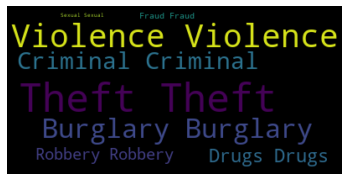

In [31]:
fig = plt.figure()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# F. Folium Maps

## Question
Persebaran Kasus Penipuan di Enfield

## 1. Prepocessing Data

In [32]:
# df_fraud_enfield = df_london_crime[
#     (df_london_crime['borough'] == 'Enfield') &
#     (df_london_crime['major_category'] == 'Fraud or Forgery')
# ]
# df_fraud_enfield

,lsoa_code,borough,major_category,minor_category,value,year,month
533,E01001450,Enfield,Fraud or Forgery,Other Fraud & Forgery,0,2010,12
1310,E01001558,Enfield,Fraud or Forgery,Other Fraud & Forgery,0,2008,4
1877,E01001513,Enfield,Fraud or Forgery,Other Fraud & Forgery,0,2011,6
3452,E01001447,Enfield,Fraud or Forgery,Other Fraud & Forgery,0,2013,12
5752,E01001528,Enfield,Fraud or Forgery,Counted per Victim,0,2009,4
...,...,...,...,...,...,...,...
13486977,E01001535,Enfield,Fraud or Forgery,Counted per Victim,0,2009,4
13488135,E01001448,Enfield,Fraud or Forgery,Counted per Victim,0,2011,6
13488479,E01001568,Enfield,Fraud or Forgery,Counted per Victim,0,2016,12
13488856,E01001568,Enfield,Fraud or Forgery,Counted per Victim,0,2008,7


## 2. Create Visualization

In [34]:

import folium
world_map = folium.Map(location=[51.507222, -0.1275], zoom_start=15)
# world_map.choropleth(
#     geo_data='world_countries.json',
# #     data=df_fraud_enfield
# )
world_map

# G.Overall Analisys

Secara keseluruhan, saya mengambil data di daerah 'Enfield'. Di sana, kasus terbanyak adalah pencurian dan kasus terdikit adalah kekerasan seksual. Perkembangan kasus narkoba tidak sejalan dengan kasus kekerasan. Alasannya adalah kasus kekerasan selalu meningkat, tetapi kasus narkoba menurun sehingga penyebab kekerasan tidak kebanyakan berasal dari penyalahgunaan narkoba. Pada tahun 2010 merupakan kasus terdikit di kotan Enfield dalam periode 2008 - 2016. Akan tetapi, kasus terbanyak justru terjadi di tahun 2016. 